In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.models import load_model
from sklearn.preprocessing import scale
import keras.layers
import keras.optimizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import random

Using TensorFlow backend.


In [2]:
#Data preparation

In [3]:
Data = []
with open('../data_dim_nova.csv') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        Data.append(row)

for row in Data:
    row.pop(0)
    row.pop(0)
    
Data = Data[1:]
Data = np.array(Data)

In [4]:
mean_of_Data = Data.mean(axis=0)
std_of_Data = Data.std(axis=0)

In [5]:
std_of_Data

array([42.08133144,  4.46235735, 19.29057559, 19.28390908, 22.00444463,
       12.51419073, 22.31493201, 12.25752573, 19.52213545, 21.33943129,
       16.28460452, 14.40847832, 16.44689707, 12.26523628, 16.74008491,
       14.18980223, 18.3093869 , 18.74431063, 18.20012181, 17.29401688,
       19.55050862, 13.47191631, 42.48081582,  3.71510789, 20.0419115 ,
       19.78905576, 22.12035528, 11.76784289, 24.62027119, 14.06007095,
       19.30920824, 19.83500778, 17.08698309, 17.58930076, 16.94589266,
       14.05099295, 15.77988921, 12.35263483, 17.52527649, 17.07893044,
       17.238407  , 17.305635  , 19.74939986, 14.51864216, 23.06248046,
       20.17520312, 15.55474148,  7.49448002, 15.27116988,  7.36780107,
       13.55303504,  6.52587783,  8.95977194,  9.49047395,  7.02548947,
        7.57114401,  7.43498343,  7.16062996,  7.80304095,  7.62598392,
        7.02821232,  8.54583664,  6.06751007,  8.12420647,  8.82924547,
        6.19428313,  9.02179429,  6.05602418,  6.29404026,  7.78

In [6]:
Data = scale(Data)

In [7]:
x = []
y = []

for i in range(len(Data)-1):
    x.append([Data[i]])
    y.append([Data[i+1]])

Data = x
target_aux = y

In [8]:
data = np.array(Data)
target = np.array(target_aux)

In [9]:
data.shape

(94274, 1, 72)

In [10]:
target.shape

(94274, 1, 72)

In [11]:
data

array([[[-0.97508903, -0.25947022, -0.61173667, ..., -0.83584206,
         -0.62386316, -0.71670664]],

       [[-0.97098021, -0.26359853, -0.61268221, ..., -0.82934462,
         -0.60845703, -0.69495993]],

       [[-0.96621626, -0.26124305, -0.61394894, ..., -0.82212779,
         -0.58723781, -0.66785457]],

       ...,

       [[-0.96951056,  0.88845757, -1.4764611 , ...,  2.3238155 ,
          2.35204786,  0.82152886]],

       [[-0.9740779 ,  0.8839958 , -1.54152966, ...,  2.33359401,
          2.28426114,  0.84273647]],

       [[-0.97845989,  0.88123717, -1.5983911 , ...,  2.33890837,
          2.20461159,  0.85955903]]])

In [12]:
data = data.reshape((94274, 1, 72))
target = target.reshape((94274, 1, 72))

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data, target, test_size=0.1, random_state=4)

In [62]:
#RNN

In [63]:
model = Sequential()

In [64]:
model.add(Bidirectional(LSTM((72), batch_input_shape=(None, 1, 72), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(72), input_shape=(1, 72)))
model.add(Bidirectional(LSTM((72), batch_input_shape=(None, 1, 72), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(72), input_shape=(1, 72)))
model.add(Bidirectional(LSTM((72), batch_input_shape=(None, 1, 72), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(72), input_shape=(1, 72)))
model.add(Bidirectional(LSTM((72), batch_input_shape=(None, 1, 72), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(72), input_shape=(1, 72)))
model.add(Bidirectional(LSTM((72), batch_input_shape=(None, 1, 72), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(72), input_shape=(1, 72)))

In [65]:
adam = keras.optimizers.adam(lr = 0.0001)

In [66]:
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 1, 144)            83520     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 72)             10440     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 1, 144)            83520     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 72)             10440     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 1, 144)            83520     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 72)             10440     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 144)            83520     
__________

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Train on 84846 samples, validate on 9428 samples
Epoch 1/50
19648/84846 [=====>........................] - ETA: 23s - loss: 0.0266 - acc: 0.9389

In [ ]:
#model.save('rnn_base_nova.h5')
#model.save('../rnn_base_nova_bem_deepzona.h5')
#model = load_model('rnn_base_nova.h5')

#model = load_model('./modelo_com_todos_os_jogos.h5')
model.save('./modelo_com_todos_os_jogos.h5')

In [17]:
results = model.predict(x_test)

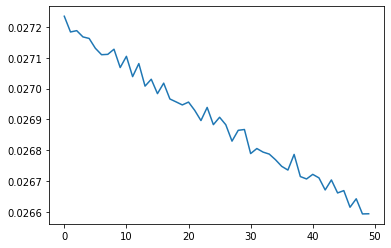

In [18]:
plt.plot(history.history['loss'])
plt.show()

In [38]:
print(results.shape)
print(y_test.shape)

(9428, 1, 72)
(9428, 1, 72)


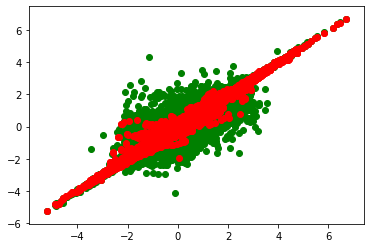

In [39]:
plt.scatter(x_test, results, c='r')
plt.scatter(x_test, y_test, c='g')
plt.scatter(x_test, results, c='r')
plt.show()

In [40]:
data[1]

array([[-9.70980211e-01, -2.63598527e-01, -6.12682205e-01,
        -1.29317550e+00, -9.09577426e-01, -4.56412913e-01,
        -8.77079889e-01,  2.75899097e-01, -4.99895002e-01,
         8.17605277e-01, -7.69791222e-01,  1.54758614e-01,
        -4.22094951e-01, -7.43184000e-01, -1.09977739e-01,
        -8.33814238e-05,  2.18846337e-01, -9.43629697e-01,
         2.00877478e-01,  1.14856407e+00,  8.77352433e-02,
         6.74532461e-02,  1.06586273e+00, -5.15741039e-01,
         7.03745063e-01,  2.78053014e-01,  6.43847901e-01,
        -2.33051136e-01,  6.09986591e-01, -4.76998758e-01,
         5.46857571e-01, -9.15794495e-01,  2.98600923e-01,
         3.98772796e-01,  5.61060222e-01, -1.05450777e-01,
         7.26885306e-01, -2.53874382e-01,  4.68957029e-01,
        -4.90496259e-01,  5.11646697e-01,  2.16197395e-01,
         4.00668035e-01, -4.78324747e-01,  1.34302489e-01,
        -4.19795564e-02, -6.66987213e-01, -1.81641706e-01,
         8.76582402e-01, -4.41021587e-01, -4.75240239e-0

In [45]:
#start = []
#for i in range():
#    x_rand = random.uniform(0, 1)
#    y_rand = random.uniform(0, 68/105)
#    start.append(x_rand)
#    start.append(y_rand)
    
start = data[1]
start = np.array(start)
start = np.reshape(start, (1, 1, 72))

jogo_simulado = [start]
next_step = start
for i in range(1000):
    next_step = model.predict(next_step)
    jogo_simulado.append(next_step)

jogo_simulado = np.array(jogo_simulado)
print(jogo_simulado.shape)  
jogo_simulado = np.reshape(jogo_simulado, (1001, 72))
print(jogo_simulado.shape)  

(1001, 1, 1, 72)
(1001, 72)


In [48]:
np.max(jogo_simulado)

143.57184141330643

In [47]:
np.savetxt('jogo_simulado.txt', jogo_simulado, delimiter=',')

In [49]:
np.min(jogo_simulado)

-28.409599820115595

In [46]:
jogo_simulado = (jogo_simulado * std_of_Data) + mean_of_Data